***
__Tóm tắt GRU Train (90%) và Test (10%)__
- Dataset: Data_stock_VJC_new.csv
***
__Kết quả evalutation__
- RMSE: 2567.96
- MAPE: 1.47789 %
- MSLE: 0.00054
***

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
# Import data and assign index with 'close' price
data = pd.read_csv('../Dataset/Data_stock_VJC_VN.csv')
df = data.reset_index()['close']

In [3]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

In [4]:
# Split train, test and validate with ratio 9:1
split = int(len(df) * 0.9)
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:split]
test_data = df[split:]

In [5]:
# Create a function to convert an array of values into a dataset matrix
def create_sequences(dataset, time_step=1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        x, y = dataset[i:(i+time_step), 0], dataset[i + time_step, 0]
        dataX.append(x)
        dataY.append(y)
    return np.array(dataX), np.array(dataY)

In [6]:
# Reshape
time_step = 100
X_train, y_train = create_sequences(train_data, time_step)
X_test, y_test = create_sequences(test_data, time_step)

In [7]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [8]:
model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.1659 - val_loss: 0.0343
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0262 - val_loss: 0.0056
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0105 - val_loss: 0.0073
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0048 - val_loss: 0.0049
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - loss: 0.0031 - val_loss: 0.0053
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0024 - val_loss: 0.0054
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0022 - val_loss: 0.0052
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0022 - val_loss: 0.0049
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0023 - val_loss: 0.0048
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0023 - val_loss: 0.0046
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0021 - val_loss: 0.0045
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step

In [10]:
y_test_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step


In [11]:
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [12]:
# Calculate RMSE
test_rmse = np.sqrt(mean_squared_error(y_test,y_test_pred))

# Calculate MAPE
test_mape = mean_absolute_percentage_error(y_test, y_test_pred) * 100

# Calculate MLSE
test_mlse = mean_squared_log_error(y_test, y_test_pred)

print("RMSE:", test_rmse)
print("MAPE:", test_mape, "%")
print("MSLE:", test_mlse)

RMSE: 2567.960030947836
MAPE: 1.4778945760580289 %
MSLE: 0.0005451568615759273


In [13]:
last_sequence = X_test[-1]
predict_90_days = []
for _ in range(90):
    input_data = last_sequence.reshape((1, time_step, 1))
    predicted_price = model.predict(input_data)[0, 0]
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_price
    predict_90_days.append(predicted_price)

predict_90_days = scaler.inverse_transform(np.array(predict_90_days).reshape(-1, 1))
predict_90_days = predict_90_days.reshape(-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

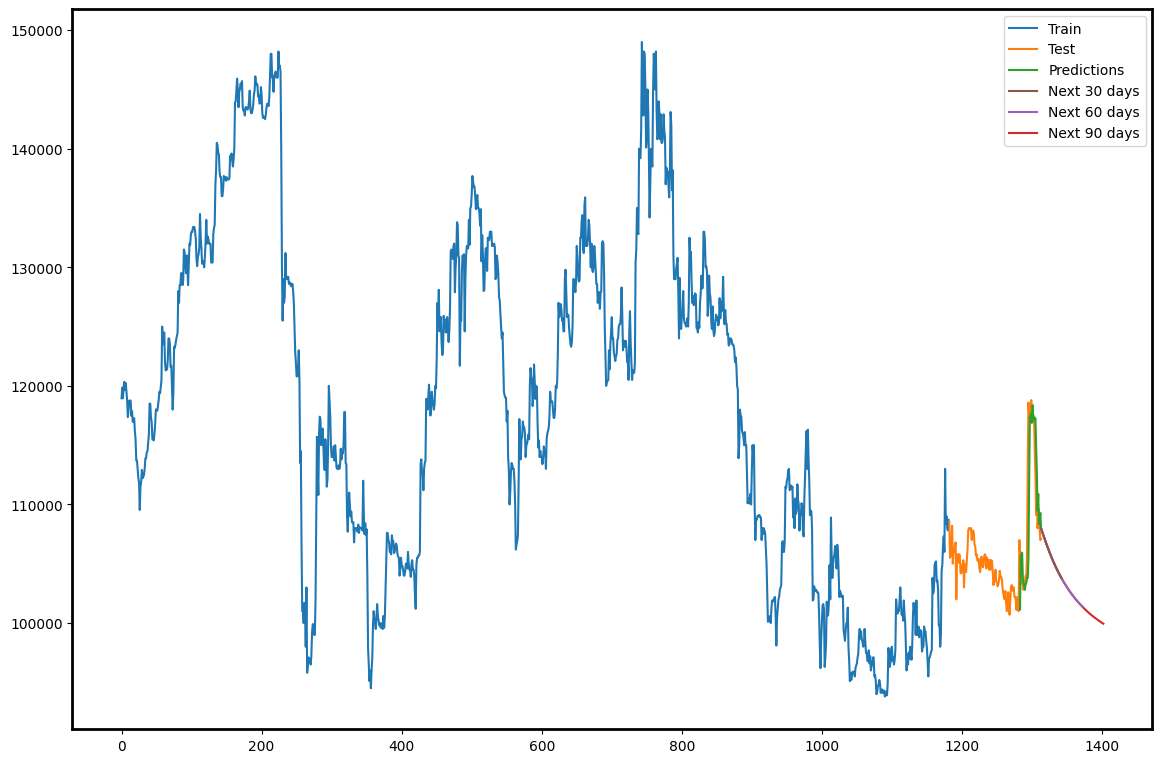

In [14]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
line1, = plt.plot(train_data_index,scaler.inverse_transform(train_data), label="Train")
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
line2, = plt.plot(test_data_index,scaler.inverse_transform(test_data), label='Test')
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
line3, = plt.plot(test_data_index,y_test_pred, label='Predictions')
predict_90_days_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+89, step=1)
line4, = plt.plot(predict_90_days_index, predict_90_days[:90], label="Next 90 days")
predict_60_days_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+59, step=1)
line5, = plt.plot(predict_60_days_index, predict_90_days[:60], label="Next 60 days")
predict_30_days_index = pd.RangeIndex(start=len(df)-1, stop=len(df)+29, step=1)
line6, = plt.plot(predict_30_days_index, predict_90_days[:30], label="Next 30 days")
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("GRU_VJC_91.png")
plt.show()